# How to analyze your own time series
_Michael Kupperman_

Run the following notebook to analyze a time series describing the progression of an outbreak using our
sliding window technique. This notebook can be run "as-is" to regenerate figure 7 from our paper, or can be easily
modified to analyze your data. See the [ReadMe on Github](https://github.com/MolEvolEpid/MachineLearningModelforHIVOutbreaks/blob/main/README.md)
 for details on how to format your data.


In [1]:
import sys
sys.path.append('../Python')  # add our python modules to the search path

In [2]:
import numpy as np
from Structures import MultipleModel as MultiModel
import matplotlib.pyplot as plt
import TimeSeries as TSM
from TimeSeries import TimeSeries as TS

Load in the model from `Trained_models/publication_trained_model/`. Point this at your trained model.

In [4]:
model = MultiModel()
window_size = 15  
key ='None'
model.import_from_directory('../Trained_models/Publication_trained_model/')
#model_15.import_from_directory(f'./Models_tmp/HIV_1x3-realmodel-rev_3/Order-{key}-{size}/')

['../Trained_models/Publication_trained_model/P-0-time-20-05-2022--18-13-26', '../Trained_models/Publication_trained_model/P-1-time-20-05-2022--18-13-26', '../Trained_models/Publication_trained_model/P-2-time-20-05-2022--18-13-26', '../Trained_models/Publication_trained_model/P-3-time-20-05-2022--18-13-26', '../Trained_models/Publication_trained_model/P-4-time-20-05-2022--18-13-26']
../Trained_models/Publication_trained_model/P-0-time-20-05-2022--18-13-26
../Trained_models/Publication_trained_model/P-1-time-20-05-2022--18-13-26
../Trained_models/Publication_trained_model/P-2-time-20-05-2022--18-13-26
../Trained_models/Publication_trained_model/P-3-time-20-05-2022--18-13-26
../Trained_models/Publication_trained_model/P-4-time-20-05-2022--18-13-26


True

Now load in the time series. Each time point should be loaded into a single `.mat` file. 

In [5]:
tdata = TS(scale_factor=296)  # Need to scale from normalized mutations

tdata.load_series_from_dir(directory = f'../Example_Data/Outbreak_series/')
olists = [str(item[0][0]) for item in tdata.ordered_labels]  # collect labels from numpy strings

Optional: Increase the font size. The backend uses `matplotlib.imshow` to avoid rectangular formatting with [pcolormesh]
(https://stackoverflow.com/questions/21166679/when-to-use-imshow-over-pcolormesh).
To avoid aliasing or smoothing, the image is intentionally made large.

In [6]:
plt.rcParams.update({'font.size':40})

The analysis is run in a few lines of front-end code using our library. 

Depending on the amount of data and if you are using a CPU or GPU, this may take up to several minutes.
A warning is raised when there are not enough samples. 

(278, 264)


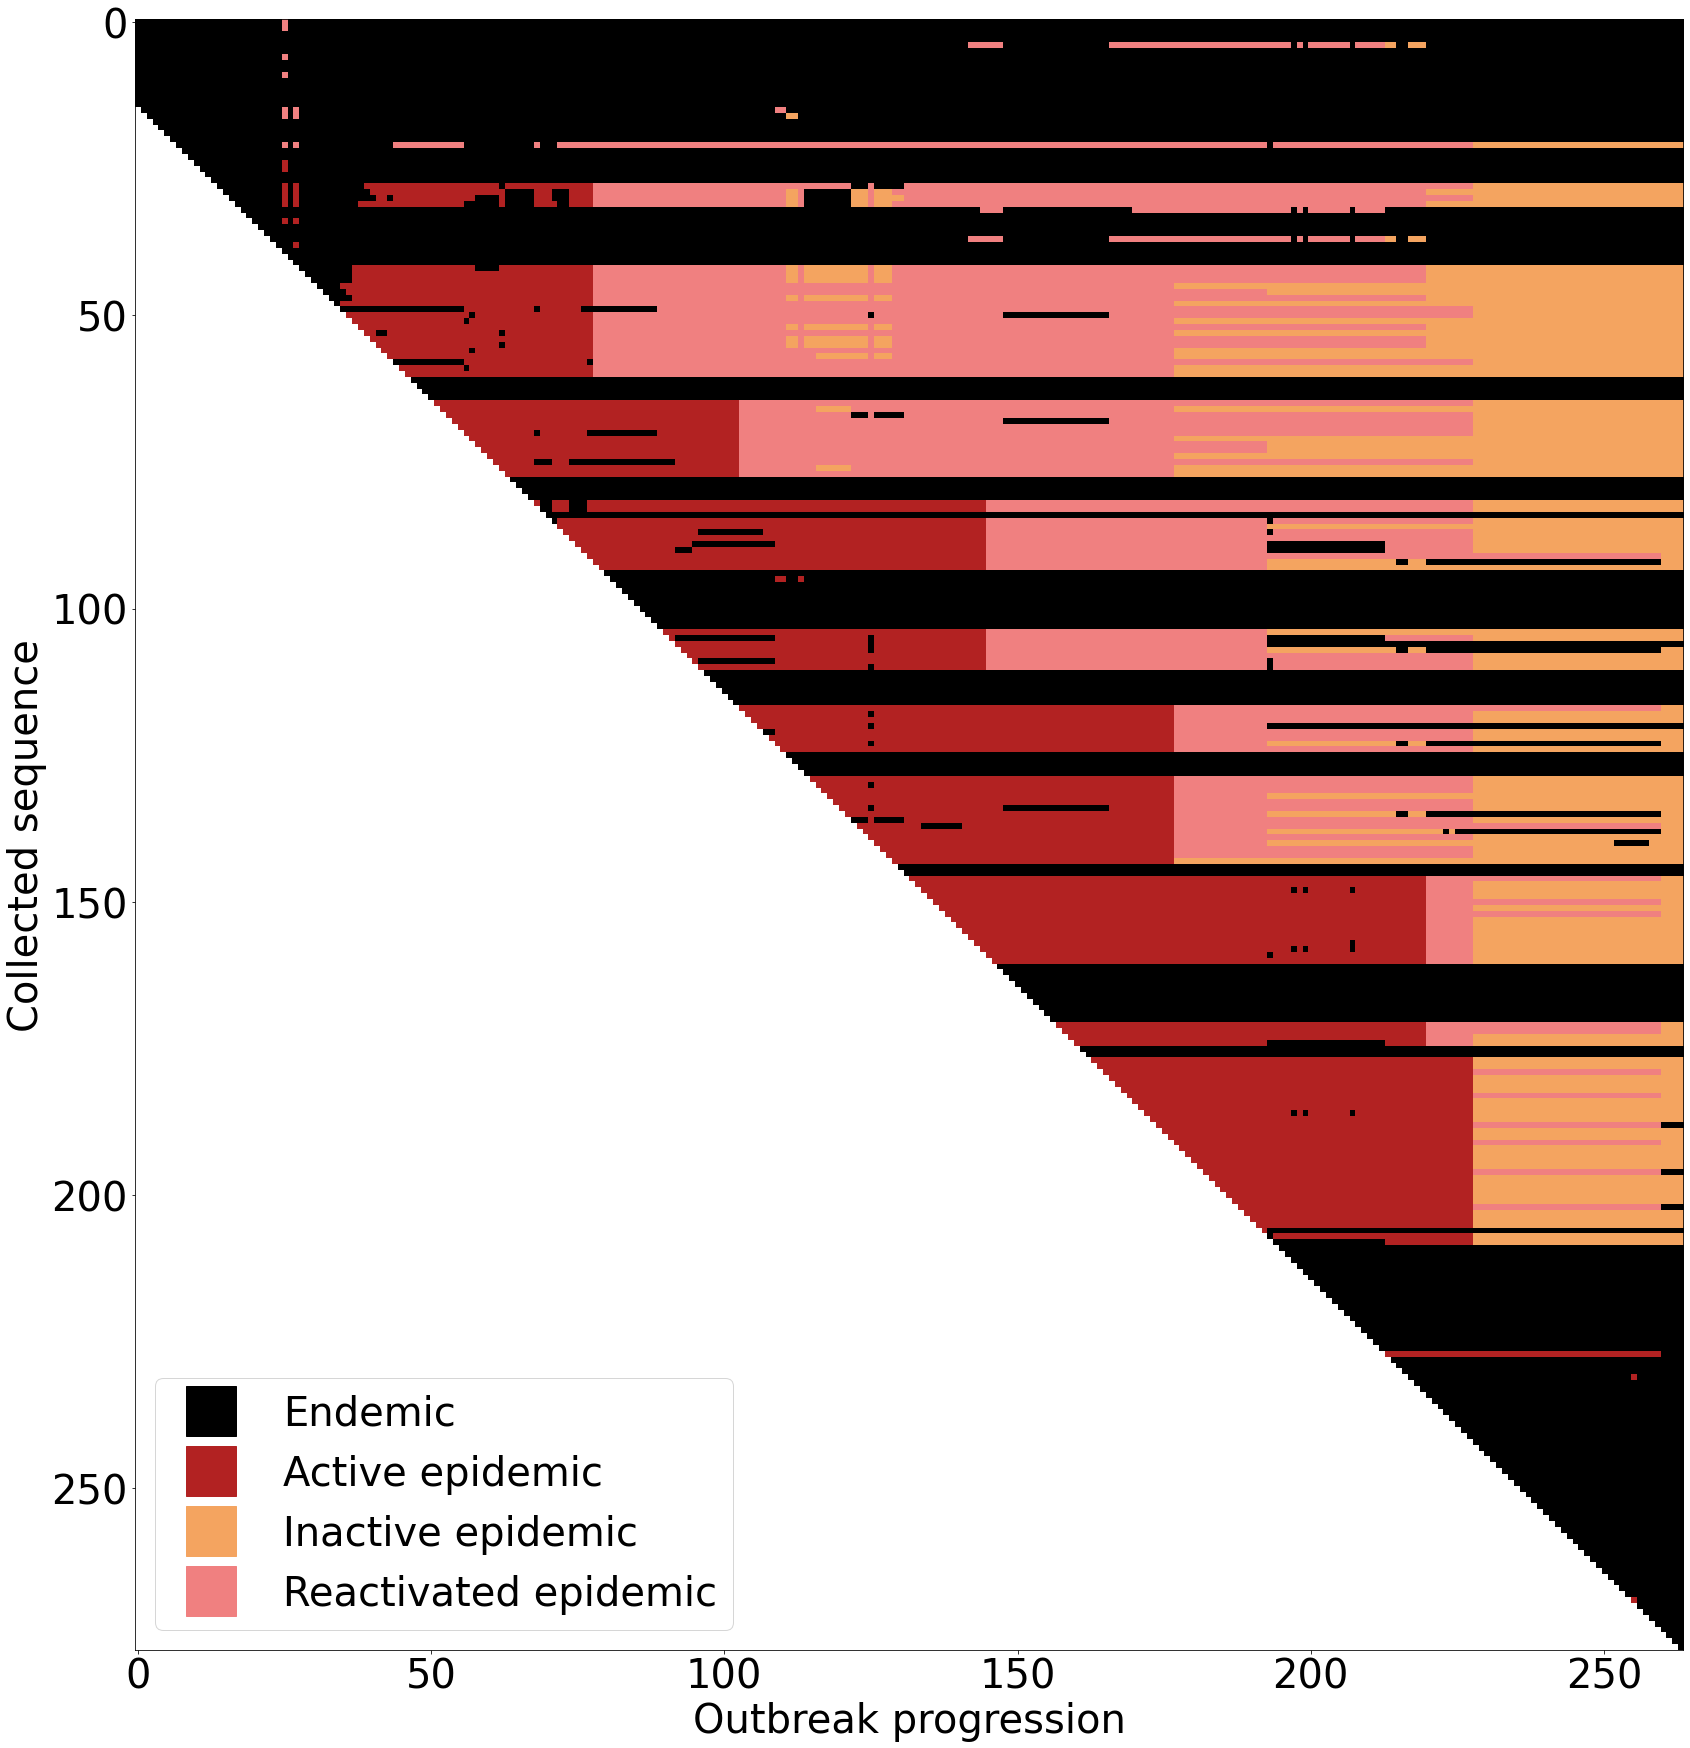

CPU times: user 1min 16s, sys: 3.89 s, total: 1min 20s
Wall time: 1min 10s


In [8]:
%%time
active_cut_length = 2  # how many years to allow an infection to be "active" before manually turning it off
# Evaluate the data set using the NN model
preds, labeldict, maplist = tdata.evaluate(model=model, window_size=window_size, choice_method='argmax', 
                                                   cluster_method='HC')
# preds - per-person predictions
# labeldict - store label keys
# maplist - store info about any sorting used to compute predictions

# Sorting is needed for large data sets

fig, ax = plt.subplots(1, figsize=(30, 30))
# Pass these into the activity plot function so we can control the size
ax, fig = TSM.plot_activity(preds=preds, sort_map_list=maplist, label_list=olists, window_size=window_size, 
                            cbar=False, legend=True,  # switch between a legend, labeled color bar, or both. 
                            fig=fig, ax=ax, active_length_cutoff=active_cut_length)
    #fig.tight_layout(
save_outputs = False # flag to enable saving outputs. 
if save_outputs:
    fig.savefig(f'./Predictions_{window_size}_active_cut_{active_cut_length}_reds.png', dpi=700, bbox_inches='tight')
    fig.savefig(f'./Predictions_{window_size}_active_cut_{active_cut_length}_reds.eps', bbox_inches='tight')
    fig.savefig(f'./Predictions_{window_size}_active_cut_{active_cut_length}_reds.pdf', bbox_inches='tight')
    fig.savefig(f'./Predictions_{window_size}_active_cut_{active_cut_length}_reds.svg', bbox_inches='tight')
plt.show()